Accuracy: 0.968


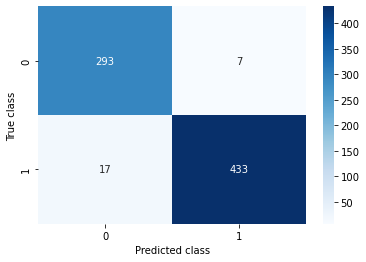

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Set path to the folders containing the images
tumor_path = r"F:\Project1\images\New Dataset\FinalAdd\DSIHE\Tumor"
non_tumor_path = r"F:\Project1\images\New Dataset\FinalAdd\DSIHE\No Tumor"

# Load the images into arrays and create labels
images = []
labels = []

# Load tumor images
for file in os.listdir(tumor_path):
    if file.endswith(".jpg"):
        img = cv2.imread(os.path.join(tumor_path, file), cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (256, 256))  # Resize to a standard size
        images.append(img)
        labels.append(1)  # Tumor class label

# Load non-tumor images
for file in os.listdir(non_tumor_path):
    if file.endswith(".jpg"):
        img = cv2.imread(os.path.join(non_tumor_path, file), cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (256, 256))  # Resize to a standard size
        images.append(img)
        labels.append(0)  # Non-tumor class label

# Convert the images and labels to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

# Create a random forest classifier and fit it to the training data
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train.reshape(X_train.shape[0], -1), y_train)

# Make predictions on the validation set and calculate accuracy
y_pred = rfc.predict(X_test.reshape(X_test.shape[0], -1))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.show()
